# Making Wordclouds

- Presents the list of downloaded pdfs in the folder 'BookDownloads3'
- Lets the user pick one book and produces a wordcloud for that book

In [2]:
import PyPDF2
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import pdfplumber

os.chdir(r'BookDownloads3')

In [3]:
pdf_files = []

def get_pdf_files():
    books = os.listdir('.')
    for book in books:
        if book.endswith('.pdf'):
            pdf_files.append(book)

get_pdf_files()            
            
# Presents the list of downloaded pdfs in the folder 'BookDownloads3'
keys = range(1, len(pdf_files) + 1)
values = pdf_files
book_dictionary = dict(zip(keys, values))

pd.DataFrame.from_dict(book_dictionary, orient='index')

,0
1,"(P.S.) Steven D. Levitt, Stephen J. Dubner - F..."
2,(Revised) Dale Carnegie - How to win friends a...
3,Cal Newport - Deep Work_ Rules for focused suc...
4,"Chip Heath, Dan Heath - Made to Stick_ Why Som..."
5,"Daniel Kahneman - Thinking, Fast and Slow .pdf"
6,"Esther Derby, Diana Larsen, Ken Schwaber - Agi..."
7,"Hans Rosling, Ola Rosling, Anna Rosling Rönnlu..."
8,Malcolm Gladwell - Blink_ The Power of Thinkin...
9,Malcolm Gladwell - Outliers_ The Story of Succ...
10,Michael E. Gerber - The E-Myth Revisited_ Why ...


In [4]:
def make_wordcloud(book_number):
    file_name = book_dictionary.get(book_number)
    
    with pdfplumber.open(file_name) as pdf:
        numpages = len(pdf.pages)
        
        book_pages = []
        
        for page in range(numpages):
            page2 = pdf.pages[page]
            text = page2.extract_text()
            
            char_to_replace = {'\t': ' ',
                              '* ': '',
                              '\n': ' '}
            # Iterate over all key-value pairs in dictionary
            for key, value in char_to_replace.items():
                # Replace key character with value character in string
                text = text.replace(key, value)
            
            book_pages.append(text)
            
        str1 = ''.join(str(e) for e in book_pages)
    
        fig = plt.subplots(figsize=(12,10)) 
        wordcloud = WordCloud().generate(str1)
        plt.title(f'The most frequent words in "{file_name}"',
                   fontsize=27)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()
        

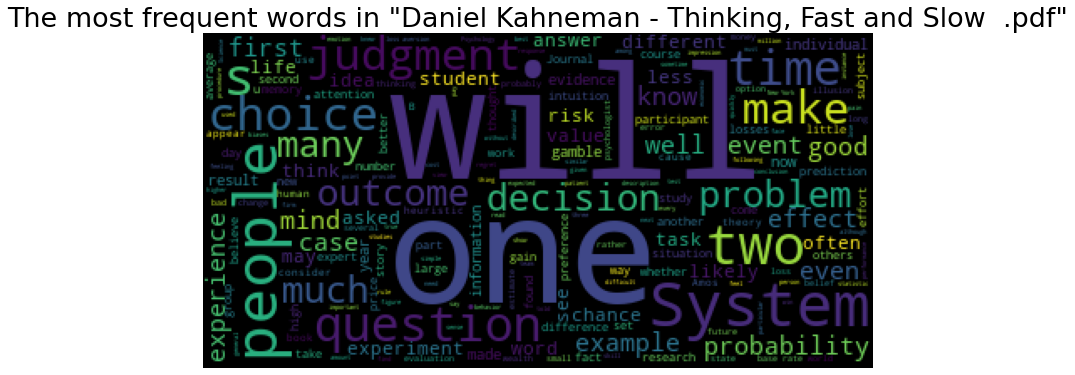

In [6]:
make_wordcloud(5)